# Multiple Linear Regression
With this example, two methods of multiple linear regression are used: gradient descent and the normal equation. Using the minimum temperature and solar exposure on a given day, the maximum temperature will be predicted

### Import modules

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

### Load in dataset
Min/max temperature are in degrees Celcius and the daily global solar exposure is measured in MJ/m*m

In [2]:
data = pd.read_csv('./data/bom_data.csv', index_col=0)
# Insert ones for the design matrix
data.insert(0, 'ones', 1)
data.head(5)

,ones,year,month,day,min_temp,max_temp,solar_exp
0,1,2013,6,2,10.4,15.7,8.0
1,1,2013,6,3,10.7,14.8,5.2
2,1,2013,6,4,11.1,15.0,3.8
3,1,2013,6,5,11.9,14.6,4.9
4,1,2013,6,6,12.6,17.3,6.2


## 1. Normal Equation Method
A derivation for the equation used can be found [here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)  
The equation to quickly get the vector of our parameters, $\theta$ we can substitute $X$, our matrix of training data (design matrix), and $y$ our vector of targets into the formula:
$$\theta = (X^{T}X)^{-1}X^{T}y$$

### Change dataset to matrix and vector

In [3]:
x_matrix = data[['ones', 'min_temp', 'solar_exp']].values
y_vector = data[['max_temp']].values

### Apply normal equation

In [4]:
weights_normal = np.dot(np.linalg.inv(np.dot(x_matrix.T, x_matrix)), np.dot(x_matrix.T, y_vector))

### Create function to predict arbritrary max temperature values

In [5]:
def predict_max(weights, min_temp, solar_exp):
    intercept, min_temp_coeff, solar_exp_coeff = weights
    return intercept + min_temp * min_temp_coeff + solar_exp * solar_exp_coeff

### Plot prediction of max temperature using other two variables

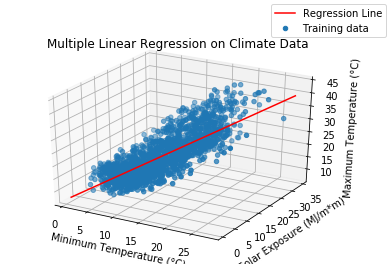

In [6]:
%matplotlib inline

# Get points to plot regression line
x1 = np.linspace(data['min_temp'].min(), data['min_temp'].max())
y1 = np.linspace(data['solar_exp'].min(), data['solar_exp'].max())
z1 = predict_max(weights_normal, x1, y1)

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data['min_temp'], data['solar_exp'], data['max_temp'], label='Training data')

# Plot regression line
ax.plot(x1, y1, z1, color='red', label='Regression Line')

# Label title and axis
ax.set_title('Multiple Linear Regression on Climate Data')
ax.set_xlabel('Minimum Temperature (°C)')
ax.set_ylabel('Solar Exposure (MJ/m*m)')
ax.set_zlabel('Maximum Temperature (°C)')
fig.legend()

## 2. Gradient Descent Method

### Change dataset to matrix and vector

In [7]:
x_matrix = data[['ones', 'min_temp', 'solar_exp']].values
y_vector = data[['max_temp']].values

### Define functions to do gradient descent and calculate cost

In [8]:
def hypothesis(predictors, weights):
    return np.dot(weights.T, predictors)

In [9]:
def error(predictors, weights, targets):
    return np.dot(predictors, weights) - targets

In [10]:
def cost(predictors, weights, targets):
    num_examples = len(targets)
    errors = error(predictors, weights, targets)
    squared_errors = errors * errors
    mse = (1 / (2 * num_examples)) * np.sum(squared_errors)
    return mse

In [11]:
def update_weights(weights, predictors, targets, learning_rate):
    num_examples = len(targets)
    temp_weights = np.zeros(len(weights))
    errors = error(predictors, weights, targets)
    for index in range(len(weights)):
        partial_dif = (1/num_examples) * np.sum(errors * predictors[:, index])
        temp_weights[index] = weights[index] - learning_rate * partial_dif
    return temp_weights

In [12]:
def grad_desc(weights, predictors, targets, learning_rate, iterations):
    costs = np.zeros(iterations)
    for iteration in range(iterations):
        costs[iteration] = cost(predictors, weights, targets)
        weights = update_weights(weights, predictors, targets, learning_rate)
    return weights, costs

### Set hyperparameters and initialise weights

In [13]:
weights_grad_desc = np.zeros(3)
learning_rate = 0.0000002
iterations = 50

### Perform gradient descent and calculate cost at each iteration

In [14]:
weights_grad_desc, costs = grad_desc(weights_grad_desc, x_matrix, y_vector, learning_rate, iterations)

### Plot cost for each iteration
Ensure that the cost decreases over time, if it increases decrease the learning rate by more

Initial cost: 433829.7849999998
Final cost: 87551.71990460852
Cost change: -346278.0650953913


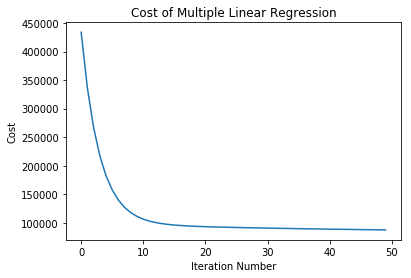

In [15]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(list(range(iterations)), costs)
ax.set_title('Cost of Multiple Linear Regression')
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Cost')
print(f'Initial cost: {costs[0]}')
print(f'Final cost: {costs[-1]}')
print(f'Cost change: {costs[-1] - costs[0]}')

### Plot prediction of max temperature using other two variables

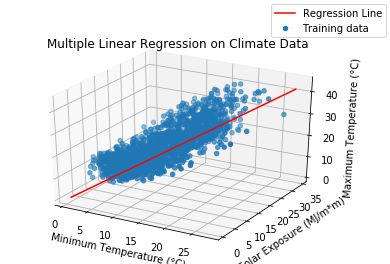

In [16]:
%matplotlib inline

# Get points to plot regression line
x1 = np.linspace(data['min_temp'].min(), data['min_temp'].max())
y1 = np.linspace(data['solar_exp'].min(), data['solar_exp'].max())
z1 = predict_max(weights_grad_desc, x1, y1)

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data['min_temp'], data['solar_exp'], data['max_temp'], label='Training data')

# Plot regression line
ax.plot(x1, y1, z1, color='red', label='Regression Line')

# Label title and axis
ax.set_title('Multiple Linear Regression on Climate Data')
ax.set_xlabel('Minimum Temperature (°C)')
ax.set_ylabel('Solar Exposure (MJ/m*m)')
ax.set_zlabel('Maximum Temperature (°C)')
fig.legend()

## 3. Compare final cost of normal method to gradient descent

In [17]:
print('Normal Method:', cost(x_matrix, weights_normal, y_vector))
print('Gradient Descent Method:', cost(x_matrix, weights_grad_desc, y_vector))

Normal Method: 7.261668562834744
Gradient Descent Method: 87412.79258508414


## 4. Discussion
In this example the normal method seems to have performed much better than gradient descent as gradient descent has found a local minima. The speed of the normal method is also much faster as the inverse of the matrix is still do-able in a short period of time. With a different dataset different results may occur